In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing
%matplotlib inline


In [2]:
data = pd.read_csv(r"C:\Shirley_Ryan_AbilityLab\RERC_STARS_Sensor_Analysis\Machine_Learning_6MWT\MWT6_AoM_Feature_Matrix60.csv", sep=',')

# data.head()
# data.shape
data.describe()
# print(data)


,FIM,BBS,MWT10_SSV,MWT10_FV,MWT6,TUG,AoM_Pel_tilt,AoM_Pel_ro,AoM_Pel_oblq,AoM_Ankle_US_x,AoM_Ankle_US_y,AoM_Ankle_US_z,AoM_Ankle_AS_x,AoM_Ankle_AS_y,AoM_Ankle_AS_z,AoM_Pel_Norm,AoM_Ankle_US_Norm,AoM_Ankle_AS_Norm,Steps
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000
mean,103.063830,36.829787,0.964386,1.355716,308.049445,16.431874,907.660840,1345.206647,889.425401,2472.120138,1676.788516,5618.187691,2406.285432,1720.984269,5456.917126,2125.476075,6820.251940,6680.732541,84.255319
std,22.517362,19.865245,0.616363,0.968001,233.696978,31.332128,590.509195,787.929367,599.323968,1543.528522,1172.917422,3565.860027,1444.005423,1240.916797,3586.058964,1228.095748,4119.800781,4105.328779,36.415539
min,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.758557,295.095333,200.558723,293.173422,198.673930,281.181043,291.749563,183.842655,272.863537,507.959945,522.394582,547.579980,14.000000
25%,87.000000,21.000000,0.344000,0.303000,62.740000,5.177000,508.853475,745.991864,401.691647,1074.324046,633.938384,1861.143668,1089.985369,710.548851,1963.617753,1192.506072,2801.405890,2796.840412,48.000000
50%,105.000000,43.000000,1.038000,1.551000,270.997500,8.510300,715.670052,1102.097870,690.941175,2321.057907,1541.424852,5966.972013,2277.001699,1299.663418,5348.437159,1820.017758,6854.033393,6478.674367,93.000000
75%,126.000000,56.000000,1.433000,2.152000,530.350000,16.935000,1103.087123,1790.131728,1240.476841,3620.468445,2468.591383,8679.728980,3549.606647,2491.644485,8682.422483,2985.682826,10571.752008,10565.218528,117.000000
max,126.000000,56.000000,2.524000,3.741000,748.500000,314.570000,3619.382558,3569.531787,2695.241222,7401.752745,6284.056567,12916.642432,5889.371050,5419.742873,12623.501247,6446.919436,14650.348092,14508.952342,146.000000


In [3]:
X = data[['AoM_Pel_tilt', 'AoM_Pel_ro', 'AoM_Pel_oblq', 'AoM_Pel_Norm',
        'AoM_Ankle_US_x', 'AoM_Ankle_US_y', 'AoM_Ankle_US_z', 'AoM_Ankle_US_Norm',
        'AoM_Ankle_AS_x', 'AoM_Ankle_AS_y', 'AoM_Ankle_AS_z', 'AoM_Ankle_US_Norm']].values

y = data['MWT6'].values.reshape(-1,1)

min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
y_scale = min_max_scaler.fit_transform(y)

# X_scale = preprocessing.scale(X)
# y_scale = preprocessing.scale(y)

print(X_scale)
print(y_scale)

[[0.18364474 0.36261085 0.1463135  ... 0.21790773 0.26992091 0.32856068]
 [0.077216   0.08808276 0.05980742 ... 0.18039402 0.3163578  0.24635397]
 [0.07979835 0.08363177 0.08062466 ... 0.03012899 0.0393266  0.04027704]
 ...
 [0.34604428 0.64422103 0.57345772 ... 0.69486094 0.88246563 0.9824328 ]
 [0.4283154  0.95984135 0.58929643 ... 0.8086922  0.75821769 0.80618365]
 [0.14891329 0.36392105 0.26901576 ... 0.21181613 0.64569625 0.62054155]]
[[0.25801069]
 [0.31131543]
 [0.03072812]
 [0.16696059]
 [0.20368737]
 [0.01402806]
 [0.4499666 ]
 [0.47163661]
 [0.09564462]
 [0.25821376]
 [0.03787575]
 [0.33895792]
 [0.52510301]
 [0.2850501 ]
 [0.02809619]
 [0.52164168]
 [0.        ]
 [0.14761523]
 [0.03536005]
 [0.07696326]
 [0.06702739]
 [0.25613761]
 [0.        ]
 [0.        ]
 [0.02793587]
 [0.22979292]
 [0.07207749]
 [0.22702204]
 [0.1738811 ]
 [0.42961122]
 [0.23496326]
 [0.        ]
 [0.07464262]
 [0.24432866]
 [0.56317702]
 [0.19385438]
 [0.03628591]
 [0.        ]
 [0.03054108]
 [0.083820

# k-Fold Cross Validation 

In [4]:
kf = KFold(n_splits=10, random_state=12, shuffle=False)
kf.get_n_splits(X)
print(kf)

KFold(n_splits=10, random_state=12, shuffle=False)


C:\Users\syshi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
TRAIN: [ 15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32
  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68
  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86
  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104
 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122
 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140] TEST: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
[-0.04677015]
[[-0.94168883 -0.70902434 -0.52114275  2.1407712  -0.20067625 -0.05366228
  -0.40343842  0.46639227  0.14710091  0.01573794  0.47863279  0.46639227]]


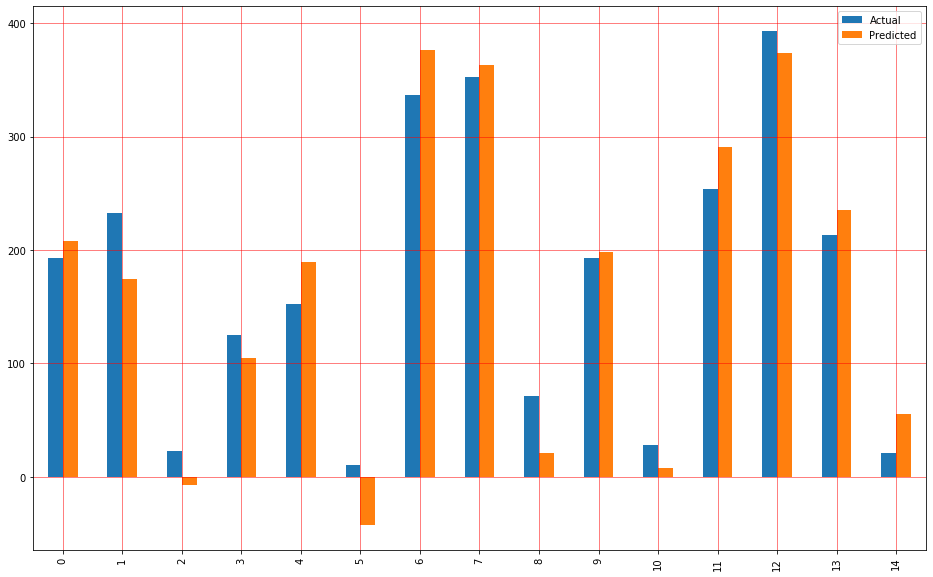

Mean Absolute Error: 30.25975447393223
Mean Absolute Error: 1152.7078227644913
RMS: 33.95155110984609
Iteration:  2
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  29  30  31
  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49
  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85
  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103
 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140] TEST: [15 16 17 18 19 20 21 22 23 24 25 26 27 28]
[-0.03821616]
[[-0.91923061 -0.69156108 -0.50445583  2.06499296 -0.30913015 -0.14141054
  -0.86071511  0.68887436  0.1363482   0.05406482  0.58025678  0.68887436]]


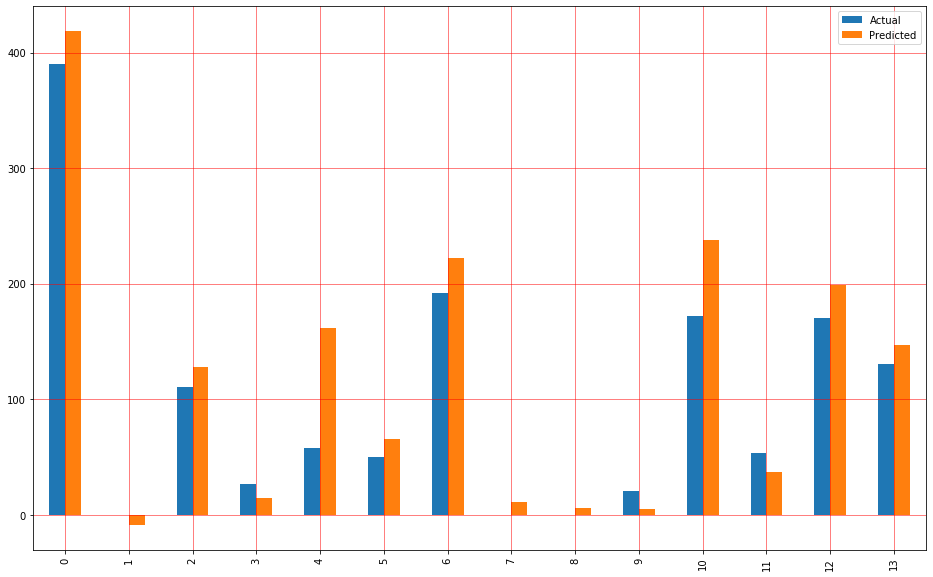

Mean Absolute Error: 26.898830156908655
Mean Absolute Error: 1387.4725609316135
RMS: 37.248792744619436
Iteration:  3
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  43  44  45  46  47  48  49
  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85
  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103
 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140] TEST: [29 30 31 32 33 34 35 36 37 38 39 40 41 42]
[-0.03994523]
[[-0.93641139 -0.71398882 -0.53798071  2.15217619 -0.1931182  -0.09622227
  -0.43935751  0.47192123  0.15835535  0.01973902  0.50545417  0.47192123]]


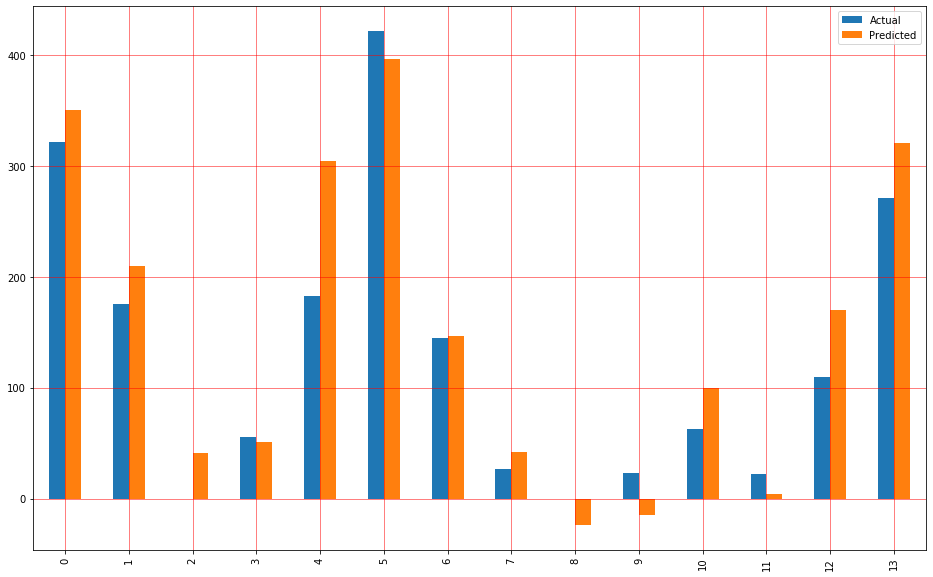

Mean Absolute Error: 35.7143935410693
Mean Absolute Error: 2091.398136007904
RMS: 45.73180661211521
Iteration:  4
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  57  58  59  60  61  62  63  64  65  66  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85
  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103
 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140] TEST: [43 44 45 46 47 48 49 50 51 52 53 54 55 56]
[-0.03790533]
[[-0.97807114 -0.76930977 -0.52107484  2.26110167 -0.18096316 -0.06816339
  -0.35294656  0.29468951  0.17543556  0.05464066  0.69511092  0.29468951]]


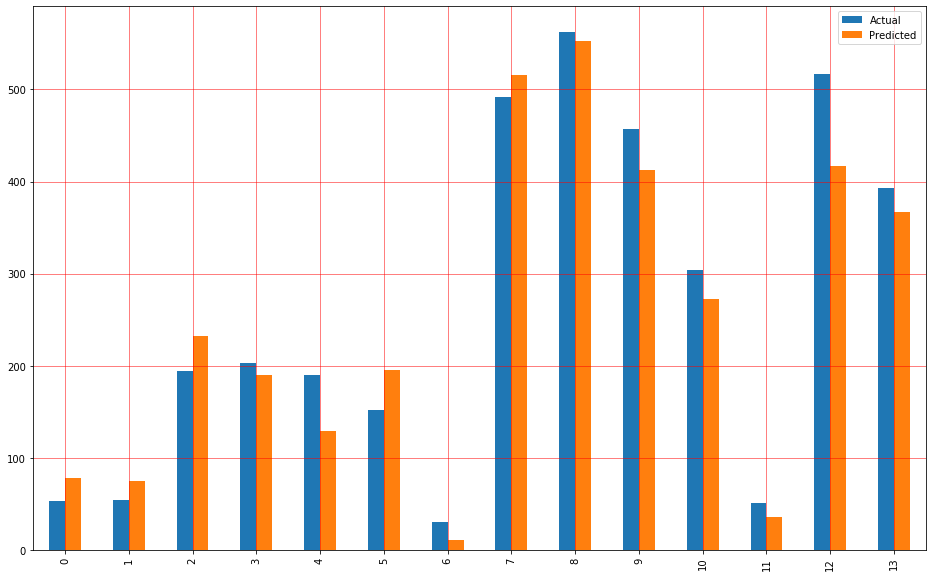

Mean Absolute Error: 33.56768843080213
Mean Absolute Error: 1645.5541595934533
RMS: 40.56543059790508
Iteration:  5
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85
  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103
 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140] TEST: [57 58 59 60 61 62 63 64 65 66 67 68 69 70]
[-0.03976711]
[[-0.94673082 -0.73077689 -0.50843736  2.1577847  -0.1911441  -0.03661168
  -0.35487473  0.37344219  0.12648748  0.03422477  0.59984088  0.37344219]]


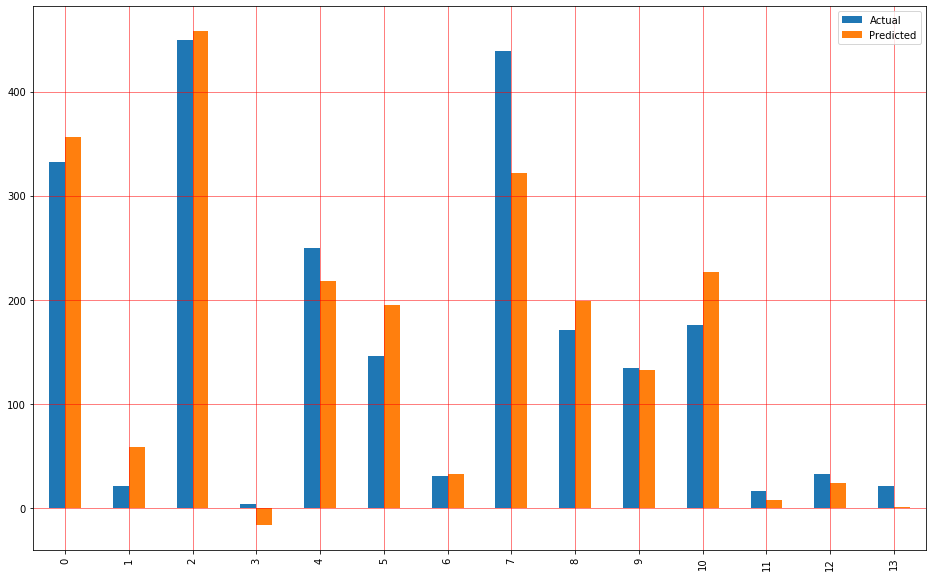

Mean Absolute Error: 29.378468155908575
Mean Absolute Error: 1696.8328080913202
RMS: 41.19263050706182
Iteration:  6
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  85
  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103
 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140] TEST: [71 72 73 74 75 76 77 78 79 80 81 82 83 84]
[-0.03934739]
[[-0.82812245 -0.64839567 -0.43057152  1.9126113  -0.1775411  -0.04229418
  -0.28374947  0.36054047  0.13688577  0.02476755  0.53935532  0.36054047]]


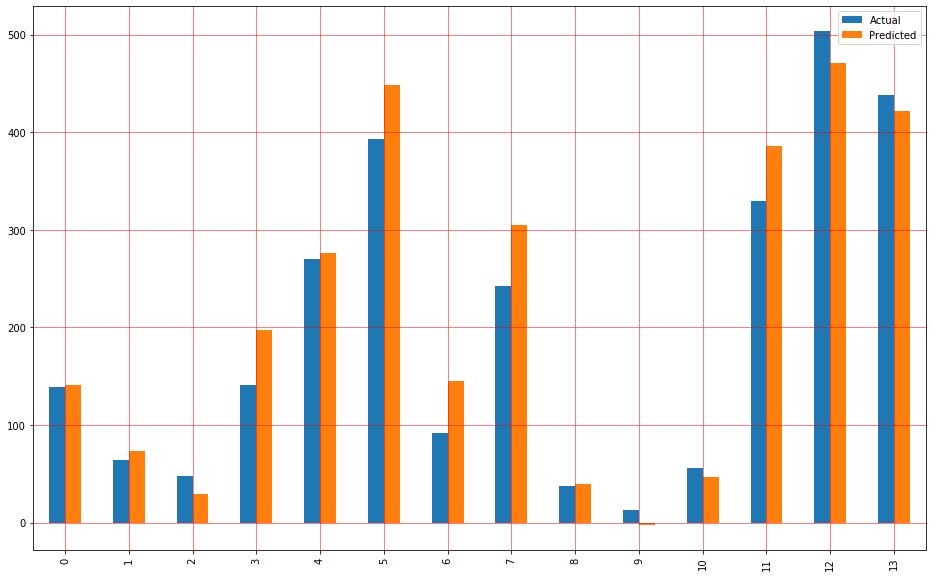

Mean Absolute Error: 28.276713933186365
Mean Absolute Error: 1303.326004518405
RMS: 36.1016066750277
Iteration:  7
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  99 100 101 102 103
 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140] TEST: [85 86 87 88 89 90 91 92 93 94 95 96 97 98]
[-0.04456435]
[[-1.08338722 -0.88414925 -0.56724044  2.50873581 -0.27330244 -0.10590654
  -0.54370583  0.56925355  0.12590749  0.02636623  0.48453734  0.56925355]]


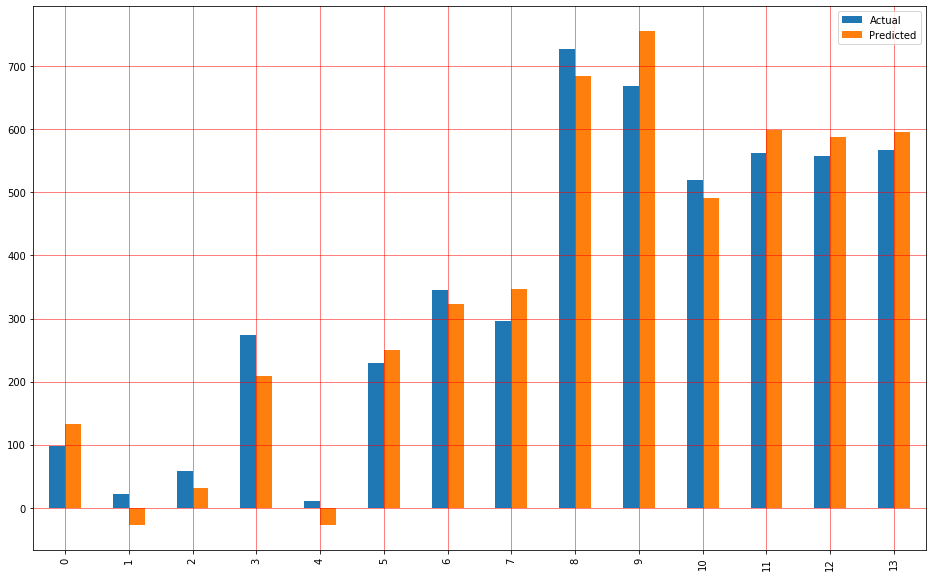

Mean Absolute Error: 40.22969413724717
Mean Absolute Error: 1925.5484877787362
RMS: 43.881072090124874
Iteration:  8
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98 113 114 115 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140] TEST: [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112]
[-0.04409949]
[[-0.64912127 -0.39459096 -0.30365142  1.35098813 -0.15731007 -0.09180547
  -0.42654995  0.43269147  0.14953163  0.06641599  0.5105676   0.43269147]]


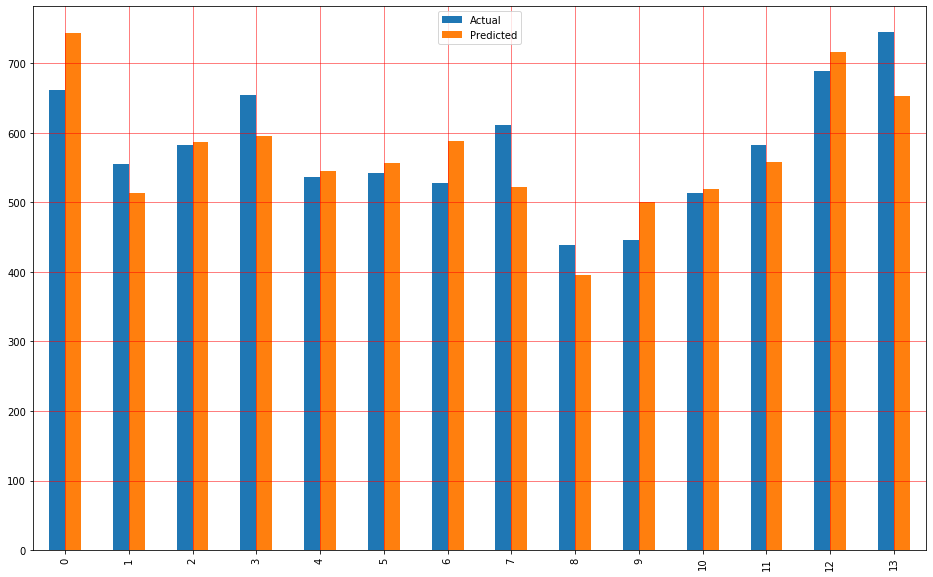

Mean Absolute Error: 43.15698371303624
Mean Absolute Error: 2738.9617720975616
RMS: 52.33509121132361
Iteration:  9
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 127 128 129 130 131 132 133 134 135 136 137 138 139
 140] TEST: [113 114 115 116 117 118 119 120 121 122 123 124 125 126]
[-0.04124497]
[[-9.34929288e-01 -6.72692220e-01 -5.40234053e-01  2.06900328e+00
  -6.43447807e-02 -1.53182548e-02 -5.28234032e-02  2.72854976e-01
   1.06861643e-01  5.58340434e-04  4.68602450e-01  2.72854976e-01]]


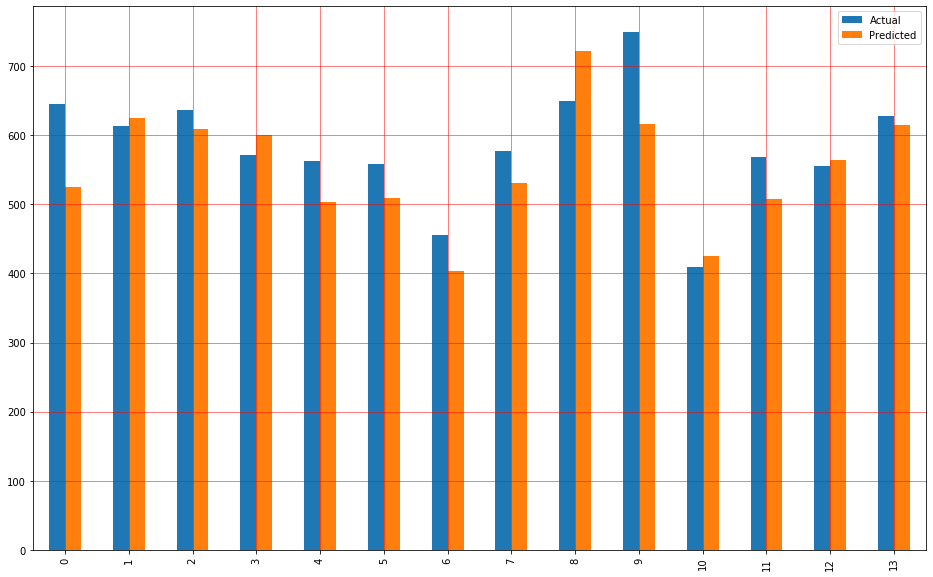

Mean Absolute Error: 49.88463238802277
Mean Absolute Error: 3864.4168273436526
RMS: 62.1644337812519
Iteration:  10
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126] TEST: [127 128 129 130 131 132 133 134 135 136 137 138 139 140]
[-0.04733647]
[[-9.58131199e-01 -8.01382898e-01 -5.37447914e-01  2.40203028e+00
  -1.86937065e-01 -8.94191084e-03 -3.00016031e-01  4.26175115e-01
   9.80500110e-02 -4.77405416e-04  4.02537466e-01  4.26175115e-01]]


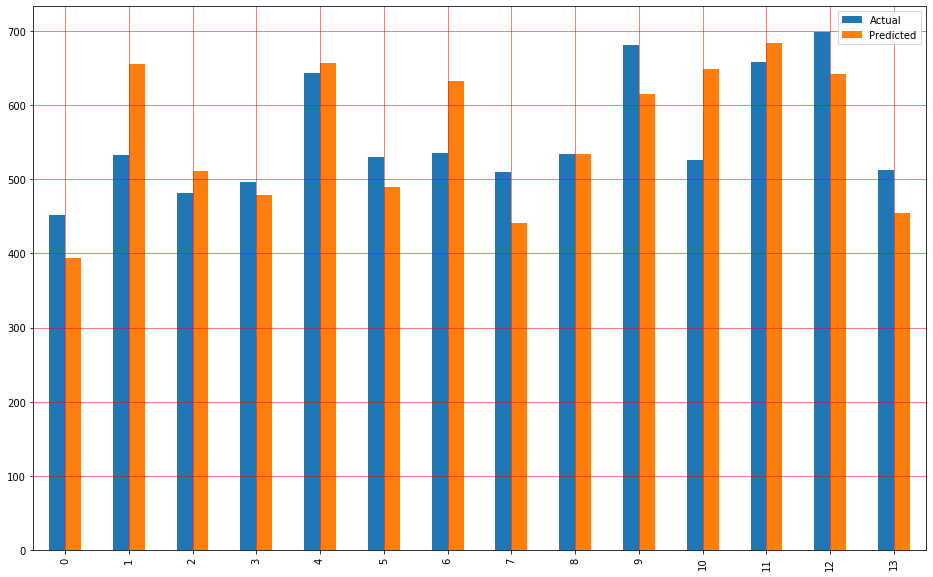

Mean Absolute Error: 55.633676950378764
Mean Absolute Error: 4458.546056318536
RMS: 66.77234499640204
Iteration:  11
RMSE: [33.95155111 37.24879274 45.73180661 40.5654306  41.19263051 36.10160668
 43.88107209 52.33509121 62.16443378 66.772345  ]
Average RMSE: 45.994476032567775 +- 10.534924680989223


In [5]:
i = 1
RMSE = np.zeros((10))

print(RMSE)

for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_scale[train_index], X_scale[test_index]
    y_train, y_test = y_scale[train_index], y_scale[test_index]
   
    regressor = LinearRegression()
    regressor.fit(X_train,y_train)

    print(regressor.intercept_)
    print(regressor.coef_)

    y_pred = regressor.predict(X_test)

    y_pred_ = y_pred*(max(y)-min(y))+min(y)
    y_test_ = y_test*(max(y)-min(y))+min(y)
    
    df = pd.DataFrame({'Actual': y_test_.flatten(), 'Predicted': y_pred_.flatten()})
    df
    
    df1 = df.head(25)
    df1.plot(kind='bar', figsize=(16,10))
    plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
    # plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
    plt.show()
    
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_, y_pred_))
    print('Mean Absolute Error:', metrics.mean_squared_error(y_test_, y_pred_))
    print('RMS:', np.sqrt(metrics.mean_squared_error(y_test_, y_pred_)))
    
    RMSE[i-1] = np.sqrt(metrics.mean_squared_error(y_test_, y_pred_))
    
    i = i+1
    print("Iteration: ", i)
    

print("RMSE:", RMSE)
RMSE_mean = np.mean(RMSE)
RMSE_std = np.std(RMSE)

print("Average RMSE:",RMSE_mean, "+-", RMSE_std)
    

# Leave-one-out Cross Validation

In [6]:
loo = LeaveOneOut()
loo.get_n_splits(X)
i = 1
RMSE = np.zeros((141))
for train_index, test_index in loo.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_scale[train_index], X_scale[test_index]
    y_train, y_test = y_scale[train_index], y_scale[test_index]
    
    regressor = LinearRegression()
    regressor.fit(X_train,y_train)

    # coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
    # coeff_df

    print(regressor.intercept_)
    print(regressor.coef_)

    y_pred = regressor.predict(X_test)
    
    y_pred_ = y_pred*(max(y)-min(y))+min(y)
    y_test_ = y_test*(max(y)-min(y))+min(y)


    df = pd.DataFrame({'Actual': y_test_.flatten(), 'Predicted': y_pred_.flatten()})
    df
    
#     df1 = df.head(25)
#     df1.plot(kind='bar', figsize=(16,10))
#     plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
#     # plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
#     plt.show()
    
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_, y_pred_))
    print('Mean Absolute Error:', metrics.mean_squared_error(y_test_, y_pred_))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_, y_pred_)))
    
    RMSE[i-1] = np.sqrt(metrics.mean_squared_error(y_test_, y_pred_))
    
    i = i+1
    print("Iteration: ", i)
    

print("RMSE:", RMSE)
RMSE_mean = np.mean(RMSE)
RMSE_std = np.std(RMSE)

print("Average RMSE:",RMSE_mean, "+-", RMSE_std)
        

TRAIN: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140] TEST: [0]
[-0.0418569]
[[-0.91858953 -0.69623131 -0.49907346  2.09595719 -0.19029704 -0.0600316
  -0.3724677   0.42546727  0.13442887  0.02703149  0.5177383   0.42546727]]
Mean Absolute Error: 15.188350833041397
Mean Absolute Error: 230.6860010275493
RMSE: 15.188350833041397
Iteration:  2
TRAIN: [  0   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  

[-0.04344861]
[[-0.9241821  -0.70492118 -0.50134101  2.11139304 -0.19779396 -0.06314443
  -0.38949665  0.44267942  0.13580716  0.02626552  0.5081736   0.44267942]]
Mean Absolute Error: 40.204104667368014
Mean Absolute Error: 1616.3700321046827
RMSE: 40.204104667368014
Iteration:  40
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140] TEST: [39]
[-0.04107989]
[[-0.92414964 -0.70465657 -0.50243816  2.11316153 -0.19454311 -0.06555536
  -0.39832689  0.43289862  0.13756363  0.

Mean Absolute Error: 2486.2915764144054
RMSE: 49.86272732627454
Iteration:  79
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140] TEST: [78]
[-0.04123326]
[[-0.92270633 -0.72025429 -0.50225583  2.12691875 -0.2107895  -0.07404152
  -0.41699817  0.45512785  0.13842128  0.02426857  0.52279599  0.45512785]]
Mean Absolute Error: 60.68571582853082
Mean Absolute Error: 3682.7561056211957
RMSE: 60.68571582853082
Iteration:  80
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10 

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140] TEST: [121]
[-0.04489489]
[[-0.80398716 -0.56562582 -0.43077299  1.80708736 -0.2452988  -0.07487106
  -0.44796938  0.48041116  0.13106482  0.02242724  0.52996173  0.48041116]]
Mean Absolute Error: 98.72513545376626
Mean Absolute Error: 9746.652370364494
RMSE: 98.72513545376626
Iteration:  123
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  